In [ ]:
#!pip install fbprophet

In [19]:
import pandas as pd
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pandas as pd

In [20]:
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [21]:
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import requests
import json

In [23]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [24]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

## Part 1: DJones

### Historical Data

In [7]:
historical_period = "2013-2015"
prediction_period = "2015-2016"
index = "DJones"

query = '''
select * from DJones
where Date > "2013-06-01" and Date < "2015-07-01"
'''

data = pd.read_sql(query, conn)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-06-03,15124,15254,15124,15254,15254,1479800
1,2013-06-04,15255,15305,15101,15178,15178,1342800
2,2013-06-05,15168,15169,14946,14961,14961,1414000
3,2013-06-06,14955,15041,14844,15041,15041,1404100
4,2013-06-07,15044,15256,15044,15248,15248,1373800


In [9]:
global_slowdown_DJ_historical = data[['Date', 'Close']]

In [12]:
#global_slowdown_DJ_historical.to_sql(name = "global_slowdown_DJ_historical", if_exists="append", con=conn, index=False)

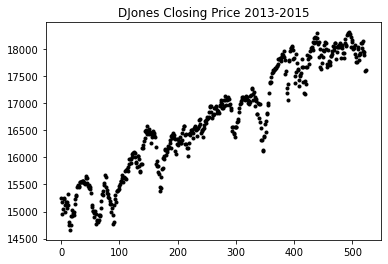

In [13]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title(f'{index} Closing Price {historical_period}')
plt.show()

### Predictive Model - Decline and Recovery

In [14]:
data = data[['Date', 'Close']]
data = data.rename(columns = {"Date":"ds","Close":"y"})

from fbprophet import Prophet

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
prediction.tail()

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
884,2016-06-25,19005.450819,17943.319667,19680.852551,18155.057275,19888.612107,-226.790371,-226.790371,-226.790371,-186.094996,...,23.261876,23.261876,23.261876,-63.957251,-63.957251,-63.957251,0.0,0.0,0.0,18778.660448
885,2016-06-26,19007.677262,17927.778412,19697.868813,18156.320288,19894.612288,-224.276059,-224.276059,-224.276059,-186.094996,...,23.261874,23.261874,23.261874,-61.442937,-61.442937,-61.442937,0.0,0.0,0.0,18783.401203
886,2016-06-27,19009.903706,17903.569279,19648.654248,18156.539579,19900.120601,-253.609213,-253.609213,-253.609213,-186.094996,...,-10.787552,-10.787552,-10.787552,-56.726665,-56.726665,-56.726665,0.0,0.0,0.0,18756.294493
887,2016-06-28,19012.130149,17900.550796,19730.201848,18155.787778,19903.865096,-250.591544,-250.591544,-250.591544,-186.094996,...,-14.629896,-14.629896,-14.629896,-49.866651,-49.866651,-49.866651,0.0,0.0,0.0,18761.538606
888,2016-06-29,19014.356593,17934.861409,19692.223034,18156.499064,19907.609592,-243.904793,-243.904793,-243.904793,-186.094996,...,-16.842815,-16.842815,-16.842815,-40.966982,-40.966982,-40.966982,0.0,0.0,0.0,18770.451800


In [16]:
global_slowdown_DJ_predict = prediction[['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper']]
global_slowdown_DJ_predict.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper
884,2016-06-25,19005.450819,17943.319667,19680.852551,18155.057275,19888.612107
885,2016-06-26,19007.677262,17927.778412,19697.868813,18156.320288,19894.612288
886,2016-06-27,19009.903706,17903.569279,19648.654248,18156.539579,19900.120601
887,2016-06-28,19012.130149,17900.550796,19730.201848,18155.787778,19903.865096
888,2016-06-29,19014.356593,17934.861409,19692.223034,18156.499064,19907.609592


In [18]:
#global_slowdown_DJ_predict.to_sql(name = 'global_slowdown_DJ_predict', if_exists='append', con=conn, index=False)

In [ ]:
figure = m.plot(prediction)
#plt.title(f"{index} Prediction - {prediction_period}")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
#figure.savefig(f'../static/images/{index}_{prediction_period}.png')